In [1]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
df = pd.read_csv('MSN.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,89000,89000,89200,88200,683.44K,0.11%
1,3/4/2019,89500,89100,91400,89000,1.28M,0.56%
2,3/5/2019,89400,89500,90900,89300,772.09K,-0.11%
3,3/6/2019,90000,90000,90200,89300,695.52K,0.67%
4,3/7/2019,90000,90700,91000,89800,947.51K,0.00%
...,...,...,...,...,...,...,...
1263,3/19/2024,77400,77900,79400,77200,3.13M,-0.64%
1264,3/20/2024,77300,77400,77800,76500,4.24M,-0.13%
1265,3/21/2024,78000,78500,78800,77600,4.98M,0.91%
1266,3/22/2024,78500,79800,82700,78300,6.02M,0.64%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1268 non-null   object
 1   Price     1268 non-null   int64 
 2   Open      1268 non-null   int64 
 3   High      1268 non-null   int64 
 4   Low       1268 non-null   int64 
 5   Vol.      1268 non-null   object
 6   Change %  1268 non-null   object
dtypes: int64(4), object(3)
memory usage: 69.5+ KB


<h1> Tien xu ly du lieu

In [5]:
df = df.dropna() # Drop missing values

In [6]:
df1 = df.reset_index()['Price']

In [7]:
df['Index'] = np.arange(len(df.index))

<h1> Scale du lieu

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1>Split the data into training, testing, and validation sets (7:2:1)

In [9]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

In [10]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1> Create dataset

In [11]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [14]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 96ms/step - loss: 0.0802 - val_loss: 0.0133
Epoch 2/100
13/13 [==============================] - 1s 55ms/step - loss: 0.0169 - val_loss: 0.0024
Epoch 3/100
13/13 [==============================] - 1s 54ms/step - loss: 0.0067 - val_loss: 4.7069e-04
Epoch 4/100
13/13 [==============================] - 1s 52ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0015 - val_loss: 4.4716e-04
Epoch 6/100
13/13 [==============================] - 1s 55ms/step - loss: 9.7703e-04 - val_loss: 5.4054e-04
Epoch 7/100
13/13 [==============================] - 1s 55ms/step - loss: 8.8616e-04 - val_loss: 4.6155e-04
Epoch 8/100
13/13 [==============================] - 1s 56ms/step - loss: 8.4320e-04 - val_loss: 4.6916e-04
Epoch 9/100
13/13 [==============================] - 1s 88ms/step - loss: 8.2091e-04 - val_loss: 4.5115e-04
Epoch 10/100
13/13 [==============================] - 1s 87m

<h1> Du bao du lieu test, val

In [16]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

1/1 [==============================] - 0s 41ms/step


In [17]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [18]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[91200.],
       [92900.],
       [92900.],
       [93000.],
       [92900.],
       [91300.],
       [94500.],
       [93800.],
       [91000.],
       [87600.],
       [85900.],
       [79900.],
       [82000.],
       [80500.],
       [79000.],
       [76000.],
       [74400.],
       [78300.],
       [80400.],
       [80800.],
       [83900.],
       [84500.],
       [83600.],
       [84700.],
       [83800.],
       [83500.],
       [81500.],
       [80100.],
       [80500.],
       [79000.],
       [78000.],
       [76700.],
       [77600.],
       [78800.],
       [79200.],
       [77800.],
       [76800.],
       [78400.],
       [78400.],
       [77000.],
       [77600.],
       [77200.],
       [77900.],
       [79500.],
       [79200.],
       [78100.],
       [78100.],
       [78200.],
       [78700.],
       [78000.],
       [76400.],
       [73300.],
       [71300.],
       [71400.],
       [72300.],
       [73100.],
       [70600.],
       [73000.],
       [74100.

In [19]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[64900.],
       [66200.],
       [68900.],
       [68800.],
       [68000.],
       [68100.],
       [66800.],
       [66700.],
       [67600.],
       [68300.],
       [70400.],
       [70500.],
       [70800.],
       [75700.],
       [76100.],
       [80800.],
       [78500.],
       [77500.],
       [78700.],
       [80900.],
       [78900.],
       [78500.],
       [77900.],
       [77400.],
       [77300.],
       [78000.],
       [78500.]])

<h1>
Evaluate the accuracy of the algorithm

In [20]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1804.4400442707636
Testing RMSE: 1609.7424441456235
Validation MAE: 1309.333912037037
Testing MAE: 1188.476870888158
Validation MAPE: 1.7580841980387514
Testing MAPE: 1.4957229499391915


<h1>Du doan co phieu trong 30 ngay tiep theo

In [31]:
x_input=val_data[28:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.37762862]
101
1 day input [0.17795657 0.19066566 0.22194957 0.23368104 0.23465866 0.21510622
 0.23270342 0.2229272  0.21217335 0.21510622 0.22097195 0.25225586
 0.25421111 0.23563629 0.23074817 0.2405244  0.24345726 0.22781531
 0.21315097 0.20435237 0.20826286 0.22390482 0.20044189 0.21021811
 0.21706146 0.20924049 0.21608384 0.22977055 0.25616635 0.26887544
 0.25616635 0.25225586 0.24443489 0.22488244 0.22390482 0.21706146
 0.23368104 0.2317258  0.22488244 0.2581216  0.25616635 0.26398733
 0.26398733 0.26398733 0.27767404 0.28256215 0.27474117 0.27278593
 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964 0.25030062
 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069 0.26887544
 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873 0.23856915
 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726 0.24345726
 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117 0.26203209
 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411 0.30113697
 0.34904046 0.35295095 0.3988992 

In [32]:
print(scaler.inverse_transform(lst_output))

[[78624.25436527]
 [78749.37798545]
 [78875.26981497]
 [79002.29871625]
 [79130.14460206]
 [79258.62151697]
 [79387.61057144]
 [79517.05994183]
 [79646.90256223]
 [79777.08660901]
 [79907.59379146]
 [80038.37228593]
 [80169.39465639]
 [80300.65175748]
 [80432.1192016 ]
 [80563.79698876]
 [80695.64853755]
 [80827.67384797]
 [80959.86072624]
 [81092.21222079]
 [81224.71613783]
 [81357.363332  ]
 [81490.14770642]
 [81623.07230952]
 [81756.11885062]
 [81889.30257195]
 [82022.59603748]
 [82156.00839254]
 [82289.54573405]
 [82423.18062595]]


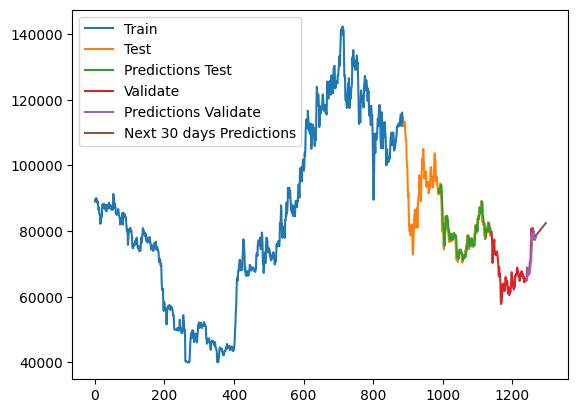

In [34]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions'])

plt.show()

<h1>Split the data into training, testing, and validation sets (6:3:1)

In [35]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

In [36]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1>Create dataset

In [37]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [40]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 4s 111ms/step - loss: 0.1951 - val_loss: 0.0460
Epoch 2/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0342 - val_loss: 0.0164
Epoch 3/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0223 - val_loss: 0.0026
Epoch 4/100
11/11 [==============================] - 1s 103ms/step - loss: 0.0106 - val_loss: 0.0029
Epoch 5/100
11/11 [==============================] - 1s 102ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 6/100
11/11 [==============================] - 1s 108ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 7/100
11/11 [==============================] - 1s 67ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
11/11 [==============================] - 1s 70ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
11/11 [==============================] - 1s 66ms/step - loss: 0.0010 - val_loss: 0.

<h1> Du bao du lieu test, val

In [42]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 29ms/step


In [43]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [44]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[104500.],
       [104800.],
       [105200.],
       [105800.],
       [106800.],
       [107200.],
       [108500.],
       [109000.],
       [111300.],
       [112000.],
       [112000.],
       [111800.],
       [112600.],
       [111900.],
       [112800.],
       [112200.],
       [112200.],
       [113700.],
       [114500.],
       [115500.],
       [115000.],
       [112000.],
       [115000.],
       [116100.],
       [115000.],
       [114000.],
       [112000.],
       [112000.],
       [112800.],
       [112500.],
       [113300.],
       [112000.],
       [110000.],
       [108600.],
       [107700.],
       [107700.],
       [102100.],
       [100000.],
       [ 99000.],
       [ 94000.],
       [ 90500.],
       [ 91400.],
       [ 86700.],
       [ 81500.],
       [ 80500.],
       [ 79800.],
       [ 81100.],
       [ 78700.],
       [ 79000.],
       [ 79000.],
       [ 82000.],
       [ 80000.],
       [ 80200.],
       [ 74800.],
       [ 72800.],
       [ 7

In [45]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[64900.],
       [66200.],
       [68900.],
       [68800.],
       [68000.],
       [68100.],
       [66800.],
       [66700.],
       [67600.],
       [68300.],
       [70400.],
       [70500.],
       [70800.],
       [75700.],
       [76100.],
       [80800.],
       [78500.],
       [77500.],
       [78700.],
       [80900.],
       [78900.],
       [78500.],
       [77900.],
       [77400.],
       [77300.],
       [78000.],
       [78500.]])

<h1>Evaluate the accuracy of the algorithm

In [46]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 2087.389874910101
Testing RMSE: 2314.930932671162
Validation MAE: 1509.0555555555557
Testing MAE: 1716.8333893369177
Validation MAPE: 2.034932216603043
Testing MAPE: 1.9714938606904673


<h1>Du doan co phieu trong 30 ngay tiep theo

In [47]:
x_input=val_data[28:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.37483734]
101
1 day input [0.17795657 0.19066566 0.22194957 0.23368104 0.23465866 0.21510622
 0.23270342 0.2229272  0.21217335 0.21510622 0.22097195 0.25225586
 0.25421111 0.23563629 0.23074817 0.2405244  0.24345726 0.22781531
 0.21315097 0.20435237 0.20826286 0.22390482 0.20044189 0.21021811
 0.21706146 0.20924049 0.21608384 0.22977055 0.25616635 0.26887544
 0.25616635 0.25225586 0.24443489 0.22488244 0.22390482 0.21706146
 0.23368104 0.2317258  0.22488244 0.2581216  0.25616635 0.26398733
 0.26398733 0.26398733 0.27767404 0.28256215 0.27474117 0.27278593
 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964 0.25030062
 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069 0.26887544
 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873 0.23856915
 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726 0.24345726
 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117 0.26203209
 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411 0.30113697
 0.34904046 0.35295095 0.3988992 

In [48]:
print(scaler.inverse_transform(lst_output))

[[78338.73656124]
 [78398.73614931]
 [78423.91024739]
 [78439.37198454]
 [78451.34629518]
 [78462.08598366]
 [78472.50253648]
 [78482.93737999]
 [78493.57646963]
 [78504.47162905]
 [78515.66553655]
 [78527.15209523]
 [78538.91911128]
 [78550.95134246]
 [78563.23049808]
 [78575.74133587]
 [78588.4625167 ]
 [78601.37879831]
 [78614.4535993 ]
 [78627.71435574]
 [78641.10924396]
 [78654.63826397]
 [78668.28922197]
 [78682.06211796]
 [78695.9295159 ]
 [78709.90056112]
 [78723.96001139]
 [78738.09262446]
 [78752.30754566]
 [78766.59258121]]


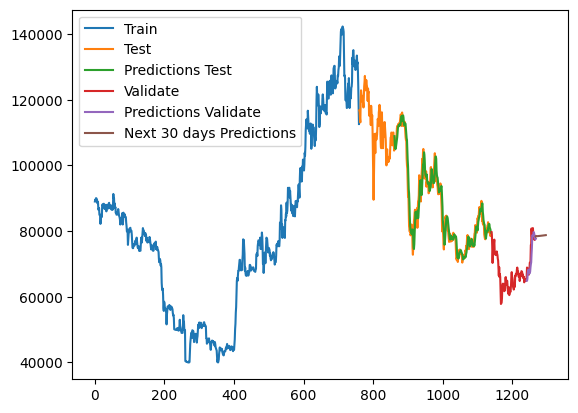

In [49]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions'])

plt.show()

<h1>Split the data into training, testing, and validation sets (5:3:2)

In [50]:
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

In [51]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1> Create dataset

In [53]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [54]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [56]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 4s 137ms/step - loss: 0.0291 - val_loss: 0.0144
Epoch 2/100
9/9 [==============================] - 1s 65ms/step - loss: 0.0095 - val_loss: 0.0037
Epoch 3/100
9/9 [==============================] - 1s 62ms/step - loss: 0.0039 - val_loss: 0.0175
Epoch 4/100
9/9 [==============================] - 1s 63ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 5/100
9/9 [==============================] - 1s 60ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/100
9/9 [==============================] - 1s 72ms/step - loss: 7.4581e-04 - val_loss: 0.0016
Epoch 7/100
9/9 [==============================] - 1s 62ms/step - loss: 6.0587e-04 - val_loss: 0.0018
Epoch 8/100
9/9 [==============================] - 1s 63ms/step - loss: 5.6267e-04 - val_loss: 0.0020
Epoch 9/100
9/9 [==============================] - 1s 59ms/step - loss: 5.4263e-04 - val_loss: 0.0016
Epoch 10/100
9/9 [==============================] - 1s 69ms/step - loss: 5.2780e-04 - val_loss: 0.001

<h1>Du bao du lieu test, val

In [58]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

5/5 [==============================] - 0s 12ms/step


In [59]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [60]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[122349.],
       [120364.],
       [121274.],
       [123756.],
       [123921.],
       [125410.],
       [132773.],
       [130787.],
       [134841.],
       [135089.],
       [132607.],
       [130291.],
       [130043.],
       [131946.],
       [130705.],
       [129050.],
       [129464.],
       [129877.],
       [131615.],
       [133435.],
       [130870.],
       [131366.],
       [128637.],
       [124087.],
       [117882.],
       [112588.],
       [116724.],
       [116228.],
       [114160.],
       [113084.],
       [119950.],
       [122846.],
       [121605.],
       [121274.],
       [121109.],
       [120447.],
       [119123.],
       [119123.],
       [117634.],
       [121191.],
       [124087.],
       [125410.],
       [127230.],
       [124914.],
       [122846.],
       [124484.],
       [125973.],
       [124782.],
       [124087.],
       [123094.],
       [119620.],
       [123392.],
       [122101.],
       [122399.],
       [115153.],
       [11

In [61]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[84500.],
       [82200.],
       [82400.],
       [81800.],
       [82100.],
       [79000.],
       [78400.],
       [77700.],
       [77500.],
       [80000.],
       [79700.],
       [80700.],
       [80000.],
       [79600.],
       [81500.],
       [81500.],
       [82700.],
       [82000.],
       [81800.],
       [79600.],
       [81000.],
       [80100.],
       [78600.],
       [79700.],
       [78500.],
       [79000.],
       [79700.],
       [78800.],
       [75400.],
       [70300.],
       [73000.],
       [76000.],
       [76500.],
       [76300.],
       [77400.],
       [74000.],
       [73500.],
       [72800.],
       [72700.],
       [73500.],
       [73200.],
       [73800.],
       [73100.],
       [72700.],
       [71600.],
       [71000.],
       [68300.],
       [66400.],
       [69000.],
       [66000.],
       [66900.],
       [66000.],
       [61400.],
       [57800.],
       [58000.],
       [58200.],
       [59500.],
       [62700.],
       [63900.

<h1>Evaluate the accuracy of the algorithm

In [62]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1801.283487594665
Testing RMSE: 3159.377876995286
Validation MAE: 1355.080320669935
Testing MAE: 2380.457633288531
Validation MAPE: 1.9575425815192733
Testing MAPE: 2.348069630430212


<h1>Du doan co phieu trong 30 ngay tiep theo

In [65]:
x_input=val_data[28:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.29918173 0.32264466 0.33339851 0.3285104  0.3285104  0.33046564
 0.33633137 0.33339851 0.32557753 0.32362229 0.32459991 0.31677893
 0.31286844 0.29722649 0.3109132  0.31286844 0.31286844 0.30895795
 0.32068942 0.31286844 0.3109132  0.31580131 0.33339851 0.3285104
 0.34708522 0.33633137 0.35686144 0.37543626 0.37934675 0.37152578
 0.36272717 0.35783906 0.337309   0.34415235 0.35295095 0.3549062
 0.36468242 0.36859291 0.36859291 0.36174955 0.3461076  0.34415235
 0.3461076  0.34806284 0.35001809 0.35197333 0.34415235 0.37054815
 0.38325724 0.38619011 0.40867542 0.40867542 0.39792158 0.39596633
 0.3988992  0.38619011 0.42040689 0.43018311 0.42431738 0.43604884
 0.43213835 0.45071318 0.46244464 0.45657891 0.44191458 0.45071318
 0.45266842 0.47124324 0.48101946 0.469288   0.42040689 0.43507122
 0.41258591 0.41454115 0.40867542 0.41160829 0.381302   0.37543626
 0.36859291 0.36663766 0.39107822 0.38814535 0.39792158 0.39107822
 0.38716773 0.40574255 0.40574255 0.41747402 0.41063

In [66]:
print(scaler.inverse_transform(lst_output))

[[79080.28110942]
 [79533.45145616]
 [80008.40602484]
 [80499.26130745]
 [81002.30124372]
 [81515.57787427]
 [82038.03948393]
 [82569.01846221]
 [83108.06059009]
 [83654.82444119]
 [84209.0935756 ]
 [84770.67289251]
 [85339.48618069]
 [85915.42369595]
 [86498.46409914]
 [87088.57995421]
 [87685.7986972 ]
 [88290.12337658]
 [88901.61496133]
 [89520.30698439]
 [90146.27260858]
 [90779.55451217]
 [91420.28073007]
 [92068.49698901]
 [92724.29779094]
 [93387.77458936]
 [94059.01883775]
 [94738.12198961]
 [95425.21817672]
 [96120.35007739]]


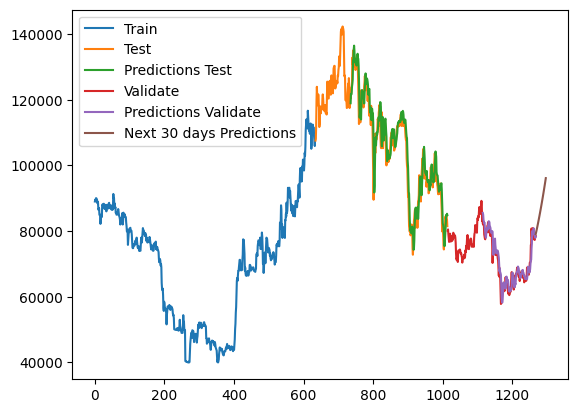

In [67]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions'])

plt.show()